<a href="https://colab.research.google.com/github/Tucker6742/CNN-sex-and-gender/blob/main/RELU_Best_Ejoyer_of_CNN_Sex_and_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle           

In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/kaggle.json" ~/.kaggle/

In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

 92% 306M/331M [00:01<00:00, 263MB/s]
100% 331M/331M [00:01<00:00, 230MB/s]


In [ ]:
!unzip -qq /content/utkface-new.zip -d /content/file

$\huge\text{Import library}$


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import random

In [ ]:
# import the necessary packages
import tensorflow as tf
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K


In [ ]:
base_path = "/content/file/UTKFace/"
files = os.listdir(base_path)
size = len(files)

(200, 200)


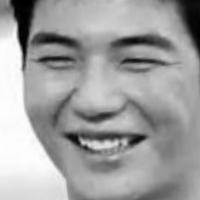

In [ ]:
shape = 70
images = []
ages = []
genders = []
i =0
for items in files:
    image = cv2.imread(base_path+items, 0)
    if i==0:
        print(image.shape)
        cv2_imshow(image)
    i+=1
    image = cv2.resize(image, dsize=(shape, shape))
    image = image.reshape((image.shape[0], image.shape[1], 1))
    images.append(image)
    split_var = items.split('_')
    ages.append(int(split_var[0]))
    genders.append(int(split_var[1]))



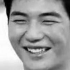

In [ ]:
cv2_imshow(images[0])

$\huge\text{Pre processing data}$


In [ ]:
#Encode age to 20 parts
def age_group(age):
    return min(age//5, 19)


In [ ]:
#Feature scaling 
target = np.zeros((size, 2), dtype = 'float64')
feature = np.zeros((size, shape, shape, 1), dtype = 'float64')
for i in range (size):
    target[i, 0] = ages[i]
    target[i, 1] = genders[i]
    feature[i] = images[i]
feature = feature/255

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, shuffle  = True)

print("Samples in Training:",x_train.shape)
print("Samples in Testing:",x_test.shape)

for i in range(len(y_train)):
    y_train[i][0] = age_group(y_train[i][0])/20

age_y_train = y_train[:, 0]
gender_y_train = y_train[:, 1]




Samples in Training: (18966, 70, 70, 1)
Samples in Testing: (4742, 70, 70, 1)


$\huge\text{Make model}$

In [ ]:
def img_cnn(drop_rate = 0):
	inputs = Input(shape=(shape,shape,1))
	conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
	pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
 
	conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(pool1)
	pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
 
	conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool2)
	pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
 
	conv4 = Conv2D(256, kernel_size=(3, 3),activation='relu')(pool3)
	pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
 
	conv5 = Conv2D(512, kernel_size=(3, 3),activation='relu')(pool4)
	pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)
 
	x = Dropout(0.25)(pool5)
	flat = Flatten()(x)
	return inputs, flat

def modeling(flat, drop_rate = 0):
	dropout = Dropout(drop_rate)
	age_model = Dense(512, activation='relu')(flat)
	age_model = dropout(age_model)
	age_model = Dense(256, activation='relu')(age_model)
	age_model = dropout(age_model)
	age_model = Dense(128, activation='relu')(age_model)
	age_model = dropout(age_model)
	age_model = Dense(64, activation='relu')(age_model)
	age_model = dropout(age_model)
	age_model = Dense(32, activation='relu')(age_model)
	age_model = dropout(age_model)
	age_model = Dense(1, activation='relu')(age_model)

	dropout = Dropout(drop_rate)
	gender_model = Dense(128, activation='relu')(flat)
	gender_model = dropout(gender_model)
	gender_model = Dense(64, activation='relu')(gender_model)
	gender_model = dropout(gender_model)
	gender_model = Dense(32, activation='relu')(gender_model)
	gender_model = dropout(gender_model)
	gender_model = Dense(16, activation='relu')(gender_model)
	gender_model = dropout(gender_model)
	gender_model = Dense(8, activation='relu')(gender_model)
	gender_model = dropout(gender_model)
	gender_model = Dense(1, activation='sigmoid')(gender_model)
	return age_model, gender_model

In [ ]:
#CNN the image
push, pull = img_cnn(0.5)

#Age and gender model
age_model, gender_model = modeling(pull, 0.25)

#Merge model
model = Model(inputs = push, outputs = [age_model, gender_model])
model.compile(optimizer = 'adam', loss =['mse', 'binary_crossentropy'],metrics=['accuracy'])

In [ ]:
Age_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 70, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 68, 68, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 66, 66, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 33, 33, 64)  0           ['conv2d_1[0][0]']               
                                                                                              

In [ ]:
Gender_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 70, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 68, 68, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 66, 66, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 33, 33, 64)  0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
def own_cnn(log, EPOCHS, check, train_index, test_index):
    
    from keras.callbacks import CSVLogger

    #Use k-fold
    X_train = x_train[train_index]
    Age_Y_train = age_y_train[train_index]
    Gender_Y_train = gender_y_train[train_index]


    X_test = x_train[test_index]
    Age_Y_test = age_y_train[test_index]
    Gender_Y_test = gender_y_train[test_index]

    #Create log and fit the train
    

    print(f"--------------------------------------------Age Fold {log}------------------------------------------------------------------")
    age_logger = CSVLogger(f'/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Logs/model fold {log}.log', separator=',', append=check)
    M = model.fit(X_train,[Age_Y_train, Gender_Y_train], validation_data = (X_test, [Age_Y_test, Gender_Y_test]), epochs = EPOCHS, callbacks=[age_logger], batch_size = BATCH_SIZE, shuffle = True) 

    model.save(f'/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Models/model.h5') 

    EPOCHS -= 1

In [ ]:
train_indexes = []
test_indexes = []

In [ ]:
c = input("Train from the last epoch? (Y/N): ")
  
         
if(c == 'N'):

    kf = KFold(n_splits = 10, random_state = 42, shuffle = True) 
    log = 0  
    for j in range(2):
        # define training hyperparameters
        BATCH_SIZE = 25
        EPOCHS = 15
        for i, (train_index, test_index) in enumerate(kf.split(x_train, y_train)):
            if i == 9:
                EPOCHS = 2
            log = log+1

            train_indexes.append(train_index)
            test_indexes.append(test_index)

                             
            # train 
            own_cnn(log, EPOCHS , False, train_index, test_index)

            EPOCHS = EPOCHS - 1
        
else:
    log = 9 #index of last log save in drive
    new_log = 0
    for j in range(2):

        if log < 10:
            log = log
        else:
            log = log - 10
            continue
        # define training hyperparameters
        BATCH_SIZE = 25
        EPOCHS = 15
        for i in range(new_log, 10, 1):
            if i == 9:
                EPOCHS = 2
            log = log + 1
    
            
            # train 
            own_cnn(log, EPOCHS - 1, True, train_indexes[log], test_indexes[log])

            EPOCHS = EPOCHS - 1

Train from the last epoch? (Y/N): N
--------------------------------------------Age Fold 1------------------------------------------------------------------
Epoch 1/15
683/683 [==============================] - 30s 24ms/step - loss: 0.2121 - accuracy: 0.1664 - val_loss: 0.1783 - val_accuracy: 0.2008
Epoch 2/15
683/683 [==============================] - 15s 23ms/step - loss: 0.1844 - accuracy: 0.2063 - val_loss: 0.1698 - val_accuracy: 0.2225
Epoch 3/15
683/683 [==============================] - 14s 21ms/step - loss: 0.1632 - accuracy: 0.2887 - val_loss: 0.1468 - val_accuracy: 0.2947
Epoch 4/15
683/683 [==============================] - 14s 20ms/step - loss: 0.1510 - accuracy: 0.3097 - val_loss: 0.1392 - val_accuracy: 0.3173
Epoch 5/15
683/683 [==============================] - 14s 21ms/step - loss: 0.1448 - accuracy: 0.3218 - val_loss: 0.1373 - val_accuracy: 0.3279
Epoch 6/15
683/683 [==============================] - 14s 20ms/step - loss: 0.1403 - accuracy: 0.3326 - val_loss: 0.1357 - 

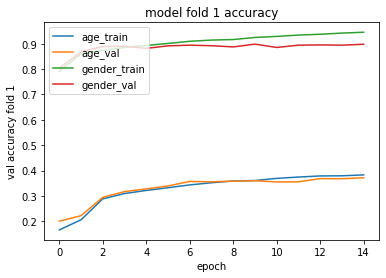

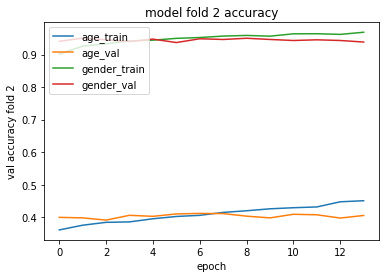

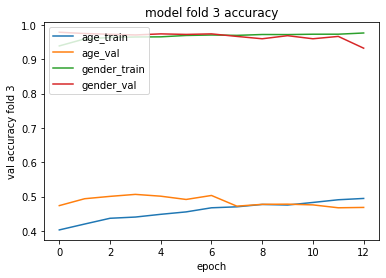

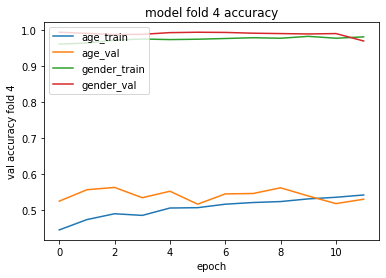

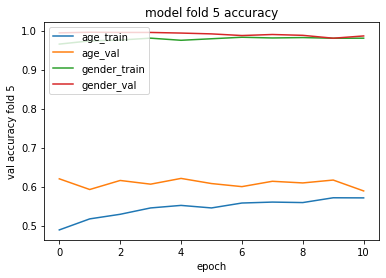

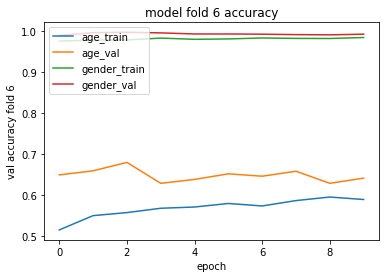

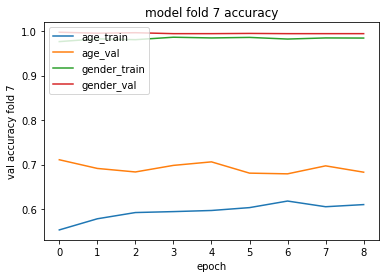

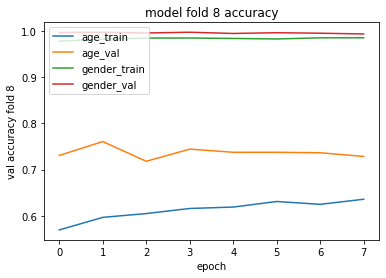

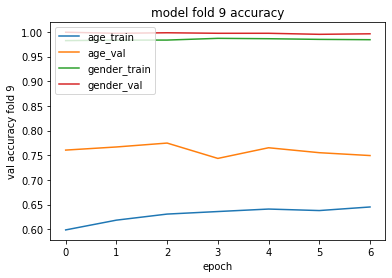

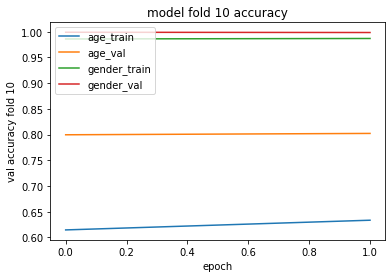

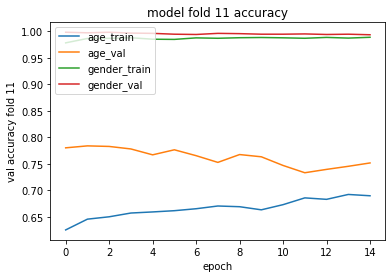

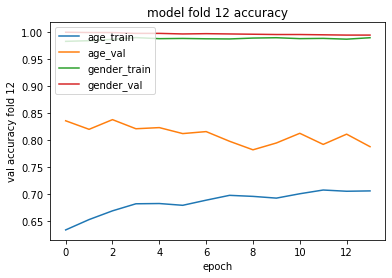

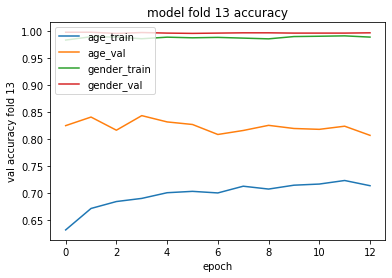

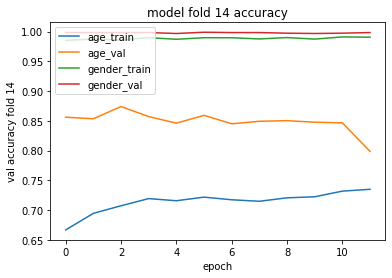

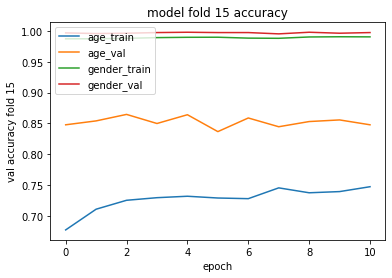

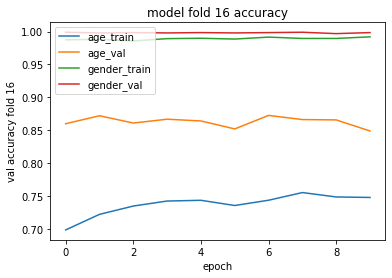

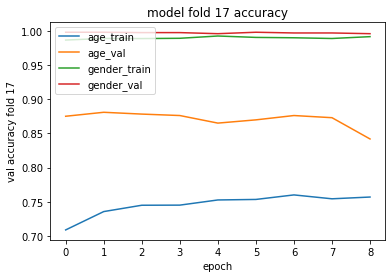

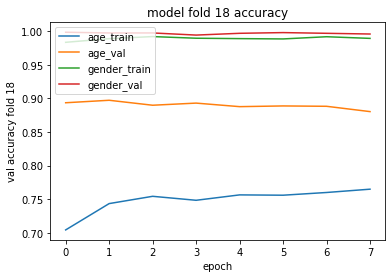

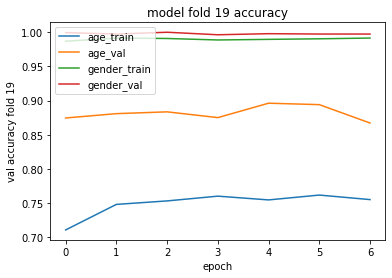

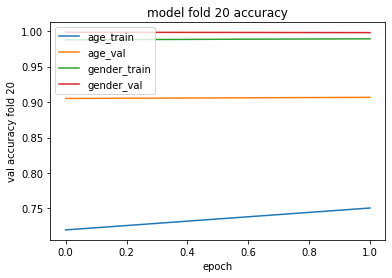

In [ ]:
%matplotlib inline
plt.close('all')
for i in range(20):
  age_history = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Logs/age model fold {i+1}.log')
  gender_history = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Logs/gender model fold {i+1}.log')
  plt.plot(age_history['epoch'], age_history['accuracy'])
  plt.plot(age_history['epoch'], age_history['val_accuracy'])
  plt.plot(gender_history['epoch'], gender_history['accuracy'])
  plt.plot(gender_history['epoch'], gender_history['val_accuracy'])
  plt.title(f'model fold {i + 1} accuracy')
  plt.ylabel(f'val accuracy fold {i + 1}')
  plt.xlabel('epoch')
  plt.legend(['age_train', 'age_val', 'gender_train', 'gender_val'], loc='upper left')
  plt.show()

In [ ]:
age_model = load_model('/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Models/age model fold.h5')
gender_model = load_model('/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Models/gender model.h5')

In [ ]:
#This is the best model of us
model = load_model('/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Checkpoints/Bản sao của model fold 5.h5')

In [ ]:
def get_age(d):
    d = d*20
    if 0 <= d <= 19:
        if d < 0.5:
            return "0 - 4"
        if d > int(d) + 0.5:
            return f"{int(d*5)} - {int(d*5+4)}"
        else:
            return f"{int((d - 1) * 5)} - {int((d - 1) * 5 + 4)}"
    return "Unknown"
    
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict(np.array([sample]))
    age_val = val[0] * 20
    if age_val > int(age_val) + 0.5:
        age_val = int(age_val) + 1
    else:
        age_val = int(age_val) 
    age = get_age(val[0])
    gender = get_gender(val[1])
    #print(val)
    #print("Predicted Gender:",gender,"Predicted Age:",age)
    return age, gender, age_val
    
    


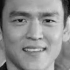

Actual Gender: Male
Age: 30
1/1 [==============================] - 0s 20ms/step
[array([[0.3493221]], dtype=float32), array([[2.278573e-11]], dtype=float32)]
Predicted Gender: Male Predicted Age: 34 - 38


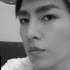

Actual Gender: Male
Age: 23
1/1 [==============================] - 0s 21ms/step
[array([[0.2994148]], dtype=float32), array([[3.9736463e-08]], dtype=float32)]
Predicted Gender: Male Predicted Age: 29 - 33


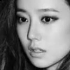

Actual Gender: Female
Age: 22
1/1 [==============================] - 0s 20ms/step
[array([[0.29454643]], dtype=float32), array([[1.]], dtype=float32)]
Predicted Gender: Female Predicted Age: 29 - 33


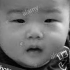

Actual Gender: Male
Age: 2
1/1 [==============================] - 0s 19ms/step
[array([[0.]], dtype=float32), array([[0.00595153]], dtype=float32)]
Predicted Gender: Male Predicted Age: 0 - 4


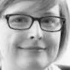

Actual Gender: Female
Age: 32
1/1 [==============================] - 0s 20ms/step
[array([[0.37458125]], dtype=float32), array([[0.9999995]], dtype=float32)]
Predicted Gender: Female Predicted Age: 32 - 36


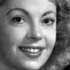

Actual Gender: Female
Age: 26
1/1 [==============================] - 0s 20ms/step
[array([[0.31128883]], dtype=float32), array([[0.4538398]], dtype=float32)]
Predicted Gender: Male Predicted Age: 26 - 30


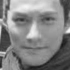

Actual Gender: Male
Age: 26
1/1 [==============================] - 0s 22ms/step
[array([[0.30785978]], dtype=float32), array([[5.4315946e-10]], dtype=float32)]
Predicted Gender: Male Predicted Age: 25 - 29


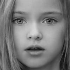

Actual Gender: Female
Age: 7
1/1 [==============================] - 0s 45ms/step
[array([[0.25224322]], dtype=float32), array([[0.9998399]], dtype=float32)]
Predicted Gender: Female Predicted Age: 20 - 24


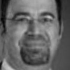

Actual Gender: Male
Age: 50
1/1 [==============================] - 0s 42ms/step
[array([[0.4799851]], dtype=float32), array([[2.1081579e-09]], dtype=float32)]
Predicted Gender: Male Predicted Age: 47 - 51


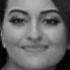

Actual Gender: Female
Age: 26
1/1 [==============================] - 0s 32ms/step
[array([[0.30417266]], dtype=float32), array([[1.]], dtype=float32)]
Predicted Gender: Female Predicted Age: 25 - 29


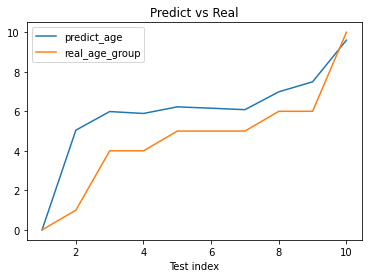

In [ ]:
import copy
#Predict the test
n_test = 10 #Number of samples for quick test

predict_age = []
real_age_group = []


index = [random.randint(0, 18666) for i in range(n_test)]
for i in index:
    sample = images[i]
    cv2_imshow(sample)
    print("Actual Gender:",get_gender(genders[i]))
    print("Age:",ages[i])
    age, gender, age_val = get_result(sample)
    predict_age.append(age_val)
    real_age_group.append(age_group(ages[i]))

real = real_age_group.copy()
predict = predict_age.copy()

real_age_group = np.array(real_age_group)
predict_age = np.array(predict_age)
predict_age = predict_age.reshape(10)

inds = real_age_group.argsort()
sorted_predict_age = predict_age[inds]
real_age_group.sort()

#Plot the real and predict line
%matplotlib inline
plt.close('all')
test = [i+1 for i in range(n_test)]
plt.plot(test, sorted_predict_age)
plt.plot(test, real_age_group)
plt.title("Predict vs Real")
plt.xlabel('Test index')
plt.legend(['predict_age', 'real_age_group'], loc='upper left')
plt.show()

In [ ]:
#Predict the test

predict_age = []
real_age_group = []


for i in range(len(x_test)):
    sample = x_test[i]*255
    #cv2_imshow(sample)
    #print("Actual Gender:",get_gender(y_test[i][1]))
    #print("Age:",y_test[i][0])
    age, gender, age_val = get_result(sample)
    predict_age.append(age_val)
    real_age_group.append(age_group(y_test[i][0]))





1/1 [==============================] - 0s 26ms/step


In [ ]:
real = real_age_group.copy()
predict = predict_age.copy()

real_age_group = np.array(real_age_group)
predict_age = np.array(predict_age)
predict_age = predict_age.reshape(len(x_test))

inds = real_age_group.argsort()
sorted_predict_age = predict_age[inds]
real_age_group.sort()

In [ ]:
sorted_predict_age.astype(int)

array([ 6,  6,  9, ..., 10, 12, 10])

In [ ]:
real_age_group

array([ 0,  0,  0, ..., 19, 19, 19])

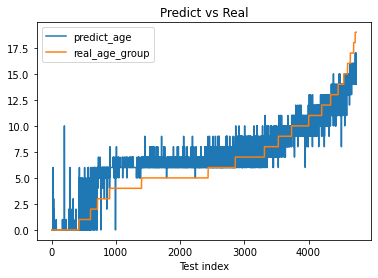

In [ ]:
#Plot the real and predict line
%matplotlib inline
plt.close('all')
test = [i+1 for i in range(len(x_test))]
plt.plot(test, sorted_predict_age.astype(int))
plt.plot(test, real_age_group)
plt.title("Predict vs Real")
plt.xlabel('Test index')
plt.legend(['predict_age', 'real_age_group'], loc='upper left')
plt.show()

In [ ]:
#Accuracy
accuracy = 0
for i in range(len(real)):
    if predict[i] == real[i]:
        accuracy = accuracy + 1
accuracy = accuracy/len(real)
print('Accuracy: ', accuracy)

Accuracy:  0.07971320118093632


In [ ]:
df = pd.DataFrame([sorted_predict_age, real_age_group])
df = df.T
df.rename(columns = {0:"Predict",1:"Real"},inplace=True)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Checkpoints/test relu.csv')

In [ ]:
df['Real'].values

array([ 0.,  0.,  0., ..., 19., 19., 19.])

In [ ]:
df['Predict'].values

array([ 0.,  0.,  0., ..., 16., 16., 14.])

Predict mean:  6.982707718262336
Real mean:  6.31568958245466
Predict variance:  11.967218315312701
Real variance:  16.05745891058118


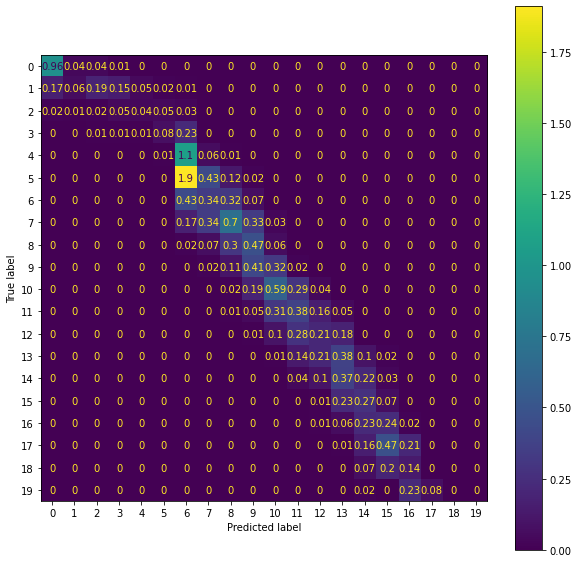

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN Sex and Age/Checkpoints/test relu.csv')
print('Predict mean: ', df['Predict'].mean())
print('Real mean: ', df['Real'].mean())
print('Predict variance: ', df['Predict'].var())
print('Real variance: ', df['Real'].var())
classes = [i for i in range(20)]
cm = confusion_matrix(df['Real'], df['Predict'], labels=classes)
cm = cm/cm.astype(float).sum(axis=1)
cm = cm.round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=classes)

disp.plot()
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()